# Importants imports

In [270]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split

# Iris dataset

In [265]:
df = pd.read_csv('iris.data', sep = ',', names = ['AT1', 'AT2', 'AT3', 'AT4', 'Label'], header=None)
df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}, inplace = True)
Xm = df.drop(['Label'], axis = 1)
Ym = df[['Label']]
df.head()

,AT1,AT2,AT3,AT4,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [266]:
df = pd.read_csv('iris.data', sep = ',', names = ['AT1', 'AT2', 'AT3', 'AT4', 'Label'], header=None)
df = pd.get_dummies(df)
df.rename(columns = {'Label_Iris-setosa': 'y1', 'Label_Iris-versicolor': 'y2', 'Label_Iris-virginica': 'y3'}, inplace = True)
Xb = df.drop(['y1', 'y2', 'y3'], axis = 1)
Yb = df[['y1', 'y2', 'y3']]
df.head()

,AT1,AT2,AT3,AT4,y1,y2,y3
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# Sets 70% from training and 30% from test

In [293]:
xm_train, xm_test, ym_train, ym_test = train_test_split(Xm, Ym, test_size=0.33, random_state=42)

In [294]:
xb_train, xb_test, yb_train, yb_test = train_test_split(Xb, Yb, test_size=0.33, random_state=42)

# 1 - K-Nearest Neighbors Classifier - KNN

In [210]:
from sklearn.neighbors import KNeighborsClassifier

In [332]:
#Classifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(xm_train, np.ravel(ym_train))

#Predicts
print('Accuracy:', (mt.accuracy_score(ym_test, knn.predict(xm_test)) * 100), '%')

Accuracy: 98.0 %


# 2 - Multilayer Perceptron - MLP

Epoch 1/100
100/100 [==============================] - 8s 77ms/step - loss: 0.3640 - acc: 0.3500
Epoch 2/100
100/100 [==============================] - 1s 7ms/step - loss: 0.2198 - acc: 0.3500
Epoch 3/100
100/100 [==============================] - 1s 7ms/step - loss: 0.1655 - acc: 0.7400
Epoch 4/100
100/100 [==============================] - 1s 8ms/step - loss: 0.1393 - acc: 0.7300
Epoch 5/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1234 - acc: 0.7300
Epoch 6/100
100/100 [==============================] - 1s 9ms/step - loss: 0.1137 - acc: 0.7900
Epoch 7/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1077 - acc: 0.8100
Epoch 8/100
100/100 [==============================] - 1s 7ms/step - loss: 0.1040 - acc: 0.8800
Epoch 9/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1004 - acc: 0.8400
Epoch 10/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0975 - acc: 0.8800
Epoch 11/100
100/100 [================

100/100 [==============================] - 1s 6ms/step - loss: 0.0205 - acc: 0.9600
Epoch 86/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0210 - acc: 0.9600
Epoch 87/100
100/100 [==============================] - 1s 8ms/step - loss: 0.0210 - acc: 0.9600
Epoch 88/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0200 - acc: 0.9700
Epoch 89/100
100/100 [==============================] - 1s 9ms/step - loss: 0.0189 - acc: 0.9700
Epoch 90/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0198 - acc: 0.9600
Epoch 91/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0202 - acc: 0.9700
Epoch 92/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0197 - acc: 0.9500
Epoch 93/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0200 - acc: 0.9700
Epoch 94/100
100/100 [==============================] - 1s 5ms/step - loss: 0.0219 - acc: 0.9600
Epoch 95/100
100/100 [=====================

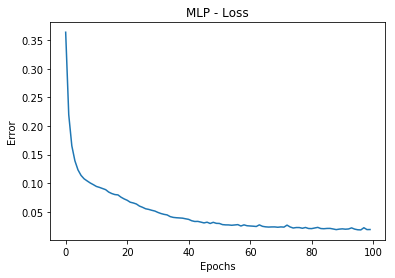

In [322]:
from keras.models import Sequential
from keras.layers import Dense

#Classifier
model = Sequential()
model.add(Dense(10, input_dim = 4, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(3, activation = 'sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(xb_train, yb_train, epochs=100, batch_size= 1)

#Predicts
results = model.evaluate(xb_test, yb_test)
print('Accuracy:', round(results[1] * 100), '%')

#Plots
plt.plot(history.history['loss'])
plt.title('MLP - Loss')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# 3 - Random Forests Classifier - RFC

In [330]:
from sklearn.ensemble import RandomForestClassifier

#Classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state= 0)
rfc.fit(xm_train, np.ravel(ym_train))

#Predicts
print('Accuracy:', (mt.accuracy_score(ym_test, rfc.predict(xm_test)) * 100), '%')

Accuracy: 98.0 %


# 4 - Support Vector Machine - SVM

In [333]:
from sklearn.svm import SVC

#Classifier
sv = SVC(gamma='auto')
sv.fit(xm_train, np.ravel(ym_train))

#Predicts
print('Accuracy:', (mt.accuracy_score(ym_test, sv.predict(xm_test)) * 100), '%')

Accuracy: 100.0 %
